In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import os.path as path
import itertools
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow.keras as keras
from tensorflow.keras.layers import Input,InputLayer, Dense, Activation, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,LearningRateScheduler, \
                                        EarlyStopping
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical, multi_gpu_model

In [3]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [4]:
data_dir = 'data/'

In [5]:
train_data = np.load(path.join(data_dir, 'imagenet_6_class_train_data.npz'))
val_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))
test_data = np.load(path.join(data_dir, 'imagenet_6_class_val_data.npz'))

In [6]:
x_train = train_data['x_data']
y_train = train_data['y_data']
x_val = val_data['x_data']
y_val = val_data['y_data']
x_test = test_data['x_data']
y_test = test_data['y_data']
y_table_array = test_data['y_table_array']

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape, y_table_array.shape

((4680, 341, 341, 3),
 (4680,),
 (1560, 341, 341, 3),
 (1560,),
 (1560, 341, 341, 3),
 (1560,),
 (6, 2))

In [7]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((4680, 341, 341, 3),
 (4680, 6),
 (1560, 341, 341, 3),
 (1560, 6),
 (1560, 341, 341, 3),
 (1560, 6))

In [8]:
y_list = [text for _, text in y_table_array]
y_list

['bed', 'bird', 'cat', 'dog', 'house', 'tree']

In [9]:
input_shape = x_train[0].shape
output_size = len(y_list)

In [10]:
def build_2d_cnn_custom_ch_64_DO(conv_num=1):
    input_layer = Input(shape=input_shape)
    x = input_layer

    for i in range(conv_num):
        x = Conv2D(kernel_size=5, filters=64*(2**(i//2)), strides=(1,1), padding='same')(x)
#         x = BatchNormalization()(x)
        x = Activation('relu')(x)
        x = MaxPooling2D(pool_size=3, strides=(3,3), padding='same')(x)

    x = Flatten()(x)
  
    x = Dropout(0.5)(x)
    output_layer = Dense(output_size, activation='softmax')(x)
    
    model = Model(inputs=input_layer, outputs=output_layer)
    
    return model

In [11]:
for i in range(1, 6):
    model = build_2d_cnn_custom_ch_64_DO(conv_num=i)
    model.summary()
    del model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 341, 341, 64)      4864      
_________________________________________________________________
activation (Activation)      (None, 341, 341, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 114, 114, 64)      0         
_________________________________________________________________
flatten (Flatten)            (None, 831744)            0         
_________________________________________________________________
dropout (Dropout)    

Train on 4680 samples, validate on 1560 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.4757 - acc: 0.4120
Epoch 00001: val_loss improved from inf to 1.19145, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_2_conv_checkpoint/001-1.1915.hdf5
4680/4680 [==============================] - 25s 5ms/sample - loss: 1.4762 - acc: 0.4118 - val_loss: 1.1915 - val_acc: 0.5404
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.0805 - acc: 0.6152
Epoch 00002: val_loss improved from 1.19145 to 1.09025, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_2_conv_checkpoint/002-1.0902.hdf5
4680/4680 [==============================] - 22s 5ms/sample - loss: 1.0806 - acc: 0.6152 - val_loss: 1.0902 - val_acc: 0.5750
Epoch 3/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.9669 - acc: 0.6640
Epoch 00003: val_loss impr

Epoch 27/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1162 - acc: 0.9717
Epoch 00027: val_loss did not improve from 0.78196
4680/4680 [==============================] - 22s 5ms/sample - loss: 0.1161 - acc: 0.9718 - val_loss: 0.9342 - val_acc: 0.7282
Epoch 28/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1027 - acc: 0.9775
Epoch 00028: val_loss did not improve from 0.78196
4680/4680 [==============================] - 22s 5ms/sample - loss: 0.1026 - acc: 0.9776 - val_loss: 0.9709 - val_acc: 0.7167
Epoch 29/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0926 - acc: 0.9818
Epoch 00029: val_loss did not improve from 0.78196
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.0925 - acc: 0.9818 - val_loss: 0.9930 - val_acc: 0.7256
Epoch 30/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0883 - acc: 0.9812
Epoch 00030: val_loss did not improve from 0.78196
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.0200 - acc: 0.9966
Epoch 00057: val_loss did not improve from 0.78196
4680/4680 [==============================] - 22s 5ms/sample - loss: 0.0199 - acc: 0.9966 - val_loss: 1.3775 - val_acc: 0.7167
Epoch 58/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0153 - acc: 0.9974
Epoch 00058: val_loss did not improve from 0.78196
4680/4680 [==============================] - 22s 5ms/sample - loss: 0.0154 - acc: 0.9974 - val_loss: 1.4609 - val_acc: 0.7013
Epoch 59/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0204 - acc: 0.9964
Epoch 00059: val_loss did not improve from 0.78196
4680/4680 [==============================] - 22s 5ms/sample - loss: 0.0204 - acc: 0.9964 - val_loss: 1.4867 - val_acc: 0.7224
Epoch 60/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0143 - acc: 0.9981
Epoch 00060: val_loss did not improve from 0.78196
4680/4680 [==============================] - 22s 5m

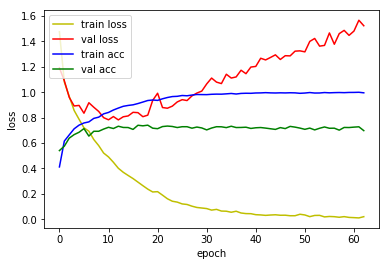

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.7366 - acc: 0.7391
Loss: 0.7365960753881015 Accuracy: 0.73910254

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.5701 - acc: 0.3639
Epoch 00001: val_loss improved from inf to 1.26788, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_3_conv_checkpoint/001-1.2679.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 1.5688 - acc: 0.3645 - val_loss: 1.2679 - val_acc: 0.4949
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.2026 - acc: 0.5300
Epoch 00002: val_loss improved from 1.26788 to 1.06572, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_3_conv_checkpoint/002-1.0657.hdf5
4680/4680 [==============================] - 23s 5ms/sample - loss: 1.2028 - acc: 0.5297 - val_loss: 1.0657 - val_acc: 0.5833
Epoch 3/500
4672/4680 [==========

Epoch 23/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3855 - acc: 0.8684
Epoch 00023: val_loss did not improve from 0.58593
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.3853 - acc: 0.8686 - val_loss: 0.6103 - val_acc: 0.7782
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3692 - acc: 0.8771
Epoch 00024: val_loss did not improve from 0.58593
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.3691 - acc: 0.8771 - val_loss: 0.6320 - val_acc: 0.7788
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3482 - acc: 0.8818
Epoch 00025: val_loss did not improve from 0.58593
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.3490 - acc: 0.8814 - val_loss: 0.6238 - val_acc: 0.7788
Epoch 26/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.3479 - acc: 0.8812
Epoch 00026: val_loss did not improve from 0.58593
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.1062 - acc: 0.9668
Epoch 00053: val_loss did not improve from 0.58593
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.1061 - acc: 0.9669 - val_loss: 0.6871 - val_acc: 0.8103
Epoch 54/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1048 - acc: 0.9683
Epoch 00054: val_loss did not improve from 0.58593
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.1053 - acc: 0.9679 - val_loss: 0.6928 - val_acc: 0.7942
Epoch 55/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1023 - acc: 0.9670
Epoch 00055: val_loss did not improve from 0.58593
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.1025 - acc: 0.9669 - val_loss: 0.7211 - val_acc: 0.8026
Epoch 56/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0955 - acc: 0.9707
Epoch 00056: val_loss did not improve from 0.58593
4680/4680 [==============================] - 23s 5m

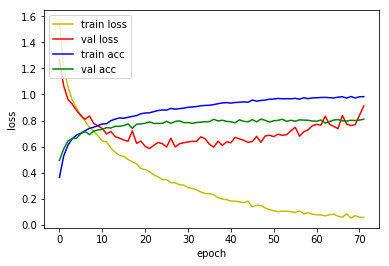

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.5952 - acc: 0.8038
Loss: 0.5952480927491799 Accuracy: 0.8038462

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.5988 - acc: 0.3363
Epoch 00001: val_loss improved from inf to 1.34154, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_4_conv_checkpoint/001-1.3415.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 1.5986 - acc: 0.3363 - val_loss: 1.3415 - val_acc: 0.4596
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.2813 - acc: 0.4951
Epoch 00002: val_loss improved from 1.34154 to 1.12558, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_4_conv_checkpoint/002-1.1256.hdf5
4680/4680 [==============================] - 23s 5ms/sample - loss: 1.2810 - acc: 0.4951 - val_loss: 1.1256 - val_acc: 0.5628
Epoch 3/500
4672/4680 [===========

Epoch 23/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4502 - acc: 0.8397
Epoch 00023: val_loss did not improve from 0.56854
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.4496 - acc: 0.8400 - val_loss: 0.5740 - val_acc: 0.7923
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4329 - acc: 0.8502
Epoch 00024: val_loss improved from 0.56854 to 0.54104, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_4_conv_checkpoint/024-0.5410.hdf5
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.4334 - acc: 0.8500 - val_loss: 0.5410 - val_acc: 0.8071
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.4053 - acc: 0.8566
Epoch 00025: val_loss did not improve from 0.54104
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.4054 - acc: 0.8564 - val_loss: 0.5665 - val_acc: 0.7962
Epoch 26/500
4672/4680 [============================>.] - ETA

Epoch 50/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1533 - acc: 0.9452
Epoch 00050: val_loss did not improve from 0.49157
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.1536 - acc: 0.9451 - val_loss: 0.5348 - val_acc: 0.8397
Epoch 51/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1408 - acc: 0.9523
Epoch 00051: val_loss did not improve from 0.49157
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.1407 - acc: 0.9524 - val_loss: 0.5272 - val_acc: 0.8404
Epoch 52/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1419 - acc: 0.9527
Epoch 00052: val_loss did not improve from 0.49157
4680/4680 [==============================] - 23s 5ms/sample - loss: 0.1417 - acc: 0.9528 - val_loss: 0.5995 - val_acc: 0.8186
Epoch 53/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.1271 - acc: 0.9557
Epoch 00053: val_loss did not improve from 0.49157
4680/4680 [===========================

4672/4680 [============================>.] - ETA: 0s - loss: 0.0516 - acc: 0.9859
Epoch 00080: val_loss did not improve from 0.49157
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0515 - acc: 0.9859 - val_loss: 0.5940 - val_acc: 0.8545
Epoch 81/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0467 - acc: 0.9844
Epoch 00081: val_loss did not improve from 0.49157
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0466 - acc: 0.9844 - val_loss: 0.5951 - val_acc: 0.8449
Epoch 82/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0422 - acc: 0.9872
Epoch 00082: val_loss did not improve from 0.49157
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0424 - acc: 0.9870 - val_loss: 0.6493 - val_acc: 0.8436
Epoch 83/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0560 - acc: 0.9812
Epoch 00083: val_loss did not improve from 0.49157
4680/4680 [==============================] - 24s 5m

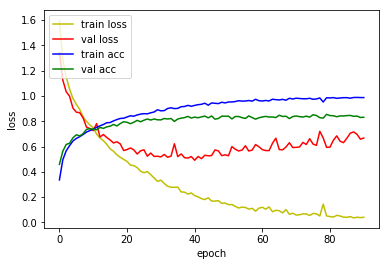

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.4916 - acc: 0.8327
Loss: 0.4915748668022645 Accuracy: 0.8326923

Train on 4680 samples, validate on 1560 samples
Epoch 1/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.5730 - acc: 0.3476
Epoch 00001: val_loss improved from inf to 1.29282, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_5_conv_checkpoint/001-1.2928.hdf5
4680/4680 [==============================] - 26s 6ms/sample - loss: 1.5729 - acc: 0.3479 - val_loss: 1.2928 - val_acc: 0.4846
Epoch 2/500
4672/4680 [============================>.] - ETA: 0s - loss: 1.2586 - acc: 0.5011
Epoch 00002: val_loss improved from 1.29282 to 1.09182, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_5_conv_checkpoint/002-1.0918.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 1.2571 - acc: 0.5019 - val_loss: 1.0918 - val_acc: 0.5737
Epoch 3/500
4672/4680 [===========

4672/4680 [============================>.] - ETA: 0s - loss: 0.2351 - acc: 0.9229
Epoch 00023: val_loss did not improve from 0.55393
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.2352 - acc: 0.9229 - val_loss: 0.5619 - val_acc: 0.8038
Epoch 24/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2161 - acc: 0.9268
Epoch 00024: val_loss did not improve from 0.55393
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.2168 - acc: 0.9267 - val_loss: 0.5998 - val_acc: 0.7910
Epoch 25/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.2207 - acc: 0.9234
Epoch 00025: val_loss improved from 0.55393 to 0.55203, saving model to model/checkpoint/vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_5_conv_checkpoint/025-0.5520.hdf5
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.2212 - acc: 0.9233 - val_loss: 0.5520 - val_acc: 0.8218
Epoch 26/500
4672/4680 [============================>.] - ETA: 0s - loss: 

Epoch 53/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0359 - acc: 0.9872
Epoch 00053: val_loss did not improve from 0.55203
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0358 - acc: 0.9872 - val_loss: 0.7798 - val_acc: 0.8192
Epoch 54/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0203 - acc: 0.9946
Epoch 00054: val_loss did not improve from 0.55203
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0203 - acc: 0.9947 - val_loss: 0.7867 - val_acc: 0.8263
Epoch 55/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0184 - acc: 0.9957
Epoch 00055: val_loss did not improve from 0.55203
4680/4680 [==============================] - 24s 5ms/sample - loss: 0.0184 - acc: 0.9957 - val_loss: 0.8019 - val_acc: 0.8256
Epoch 56/500
4672/4680 [============================>.] - ETA: 0s - loss: 0.0208 - acc: 0.9932
Epoch 00056: val_loss did not improve from 0.55203
4680/4680 [===========================

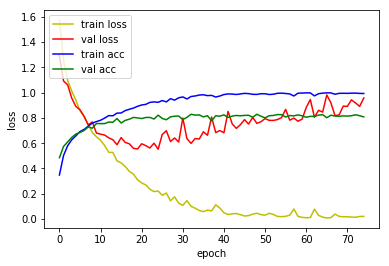

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.5520 - acc: 0.8218
Loss: 0.5520232212849152 Accuracy: 0.82179487



In [12]:
for i in range(2, 6):
    base = 'vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO'
    model_name = base+'_{}_conv'.format(i)
    model = build_2d_cnn_custom_ch_64_DO(conv_num=i)
#     model = multi_gpu_model(model, gpus=2)
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-4),
          metrics=['accuracy'])
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    os.makedirs(model_path, exist_ok=True)
    model_filename = model_path+'{epoch:03d}-{val_loss:.4f}.hdf5'
    checkpointer = ModelCheckpoint(filepath = model_filename, monitor = "val_loss", 
                                   verbose=1, save_best_only=True)

    early_stopping = EarlyStopping(monitor='val_loss', patience=50)
    hist = model.fit(x_train, y_train, batch_size=64, epochs=500, 
                     validation_data=[x_val, y_val], shuffle=True, 
                     callbacks = [checkpointer, early_stopping])

    print()
    print(model_name, 'Model')
    fig, ax = plt.subplots()
    ax.plot(hist.history['loss'], 'y', label='train loss')
    ax.plot(hist.history['val_loss'], 'r', label='val loss')
    ax.plot(hist.history['acc'], 'b', label='train acc')
    ax.plot(hist.history['val_acc'], 'g', label='val acc')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')
    ax.legend(loc='upper left')
    plt.show()

    png_path = 'visualization/learning_curve/'
    filename = model_name+'.png'
    os.makedirs(png_path, exist_ok=True)
    fig.savefig(png_path+filename, transparent=True)

    model.save(model_path+'000_last.hdf5')
    del(model)

    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + sorted(os.listdir(model_path))[-1]
    model = load_model(model_filename)
    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)
    print()

    del(model)

In [13]:
log_dir = 'log'
os.makedirs(log_dir, exist_ok=True)
base = 'vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO'

with open(path.join(log_dir, base), 'w') as log_file:
    for i in range(2, 6):
        model_name = base+'_{}_conv'.format(i)
        print()
        print(model_name, 'Model')
        model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
        model_filename = model_path + sorted(os.listdir(model_path))[-1]

        model = load_model(model_filename)
        model.summary()

        [loss, accuracy] = model.evaluate(x_test, y_test)
        print('Loss:', loss, 'Accuracy:', accuracy)

        del(model)

        log_file.write('\t'.join([model_name, str(accuracy), str(loss)])+'\n')


vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_2_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 64)      4864      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 64)      102464    
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.5520 - acc: 0.8218
Loss: 0.5520232212849152 Accuracy: 0.82179487


In [14]:
for i in range(2, 6):
    model_name = base+'_{}_conv'.format(i)
    print()
    print(model_name, 'Model')
    model_path = 'model/checkpoint/'+model_name+'_checkpoint/'
    model_filename = model_path + '000_last.hdf5'

    model = load_model(model_filename)
    model.summary()

    [loss, accuracy] = model.evaluate(x_test, y_test)
    print('Loss:', loss, 'Accuracy:', accuracy)

    del(model)


vis_imagenet_6_class_2D_CNN_custom_ch_64_DO_050_DO_2_conv Model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 341, 341, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 341, 341, 64)      4864      
_________________________________________________________________
activation_15 (Activation)   (None, 341, 341, 64)      0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 114, 114, 64)      102464    
_________________________________________________________________
activation_16 (Activation)   (None, 114, 114, 64)      0         
_________________________________________________________________
max_pooling

1560/1560 [==============================] - 4s 3ms/sample - loss: 0.9582 - acc: 0.8077
Loss: 0.958229619035354 Accuracy: 0.8076923
